# Assignment 2 - TFIDF 

In [1]:
import os
import pandas as pd
import nltk


In [2]:
df=pd.read_csv('jokes_2.csv')
data=df.drop(['Question','ID'], axis=1)

In [3]:
data.head(n=10)

,Answer
0,He nearly drown in his own tea pee.
1,Mycheexarphlexin
2,Matt
3,Jean-Luc Pickacard
4,A bullet doesn't miss Harambe
5,He was having a mid-life crisis
6,One shucks between fits...
7,Kevin Durant or Bernie Sanders?
8,Because the shark burped.
9,"A bachelor will go to the fridge, sees nothing..."


## Data Cleaning

In [4]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords

In [5]:
i=0
for txt in data['Answer']:
     w_list = re.sub(r'[^a-z\s]',' ',txt.lower()).split()
     w_list=[w for w in w_list if w not in stopwords.words('english')]
     data.loc[i,'Answer']=' '.join(w_list)
     i+=1

In [6]:
data.head()

,Answer
0,nearly drown tea pee
1,mycheexarphlexin
2,matt
3,jean luc pickacard
4,bullet miss harambe


In [7]:
df_x=data['Answer']

## TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import numpy as np

In [9]:
cv2=TfidfVectorizer(sublinear_tf=True,min_df=1)#,stop_words='english')
updated_x2=cv2.fit_transform(df_x)
fn2=cv2.get_feature_names()
# the result is a sparse matric 

In [10]:
np.shape(updated_x2)

(38269, 19958)

In [11]:
dense_x2=updated_x2.todense()
sum_x2=dense_x2.sum(axis=0)
import numpy as np
sort_list=np.argsort(sum_x2)
for i in range(0,10,1):
    print(fn2[np.array(sort_list)[0,i]])

bhabhi
izzat
sohna
nai
nal
safely
punjabifrnd
kutteyo
dekho
teri


## LSA 

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
%matplotlib inline

In [13]:
wiki_data = pd.read_csv('jokes_2.csv', index_col='Question') 

In [14]:
np.shape(wiki_data)

(38269, 2)

In [15]:
wiki_data.head()

,ID,Answer
Question,,
Did you hear about the Native American man that drank 200 cups of tea?,1,He nearly drown in his own tea pee.
What's the best anti diarrheal prescription?,2,Mycheexarphlexin
What do you call a person who is outside a door and has no arms nor legs?,3,Matt
Which Star Trek character is a member of the magic circle?,4,Jean-Luc Pickacard
What's the difference between a bullet and a human?,5,A bullet doesn't miss Harambe


In [16]:
wiki_data2=wiki_data['Answer']

In [17]:
wiki_data2.head()

Question
Did you hear about the Native American man that drank 200 cups of tea?       He nearly drown in his own tea pee.
What's the best anti diarrheal prescription?                                                    Mycheexarphlexin
What do you call a person who is outside a door and has no arms nor legs?                                   Matt
Which Star Trek character is a member of the magic circle?                                    Jean-Luc Pickacard
What's the difference between a bullet and a human?                                A bullet doesn't miss Harambe
Name: Answer, dtype: object

## Word Count Vectors

In [18]:
Question = "What did the salesman say when you asked for a 10% discount on a pair of Crocs?"
text = wiki_data2[Question]
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform([text])
features = count_vectorizer.get_feature_names()

In [19]:
count_matrix.shape

(1, 62)

In [20]:
type(count_matrix)

scipy.sparse.csr.csr_matrix

In [21]:
count_matrix2=count_matrix.toarray()[0,:]

In [22]:
count_matrix2.shape

(62,)

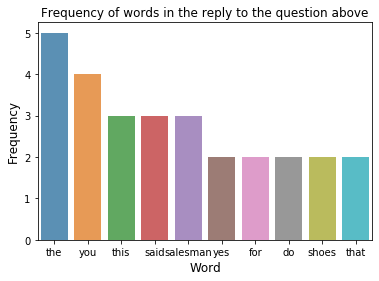

In [23]:
array_data = pd.Series(count_matrix2, index = features).sort_values(ascending=False)
sns.barplot(array_data[:10].index, array_data[:10].values, alpha=0.8)
plt.title('Frequency of words in the reply to the question above')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

## TF-IDF Vectors

In [24]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(wiki_data['Answer'])
features = tfidf_vectorizer.get_feature_names()

In [25]:
tfidf_matrix

<38269x20445 sparse matrix of type '<class 'numpy.float64'>'
	with 217144 stored elements in Compressed Sparse Row format>

In [26]:
row = wiki_data.index.get_loc(Question)
tfidf_matrix2=tfidf_matrix.getrow(row)

In [27]:
tfidf_matrix2.shape

(1, 20445)

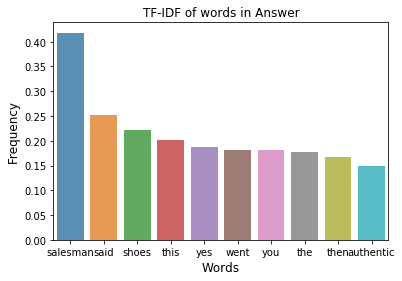

In [29]:
array_data = pd.Series(tfidf_matrix2.toarray()[0,:],index = features).sort_values(ascending=False)
sns.barplot(array_data[:10].index, array_data[:10].values, alpha=0.8)
plt.title('TF-IDF of words in Answer')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Words', fontsize=12)
plt.show()